In [1]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['vectorize.py', 'train', 'validation']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [2]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [3]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img, (100, 100))  # Resize images for consistency
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            images.append(img)
    return images

# Load images of cats and dogs
cats_folder = "cats_and_dogs_filtered/train/cats"
dogs_folder = "cats_and_dogs_filtered/train/dogs"
cats_images = load_images_from_folder(cats_folder)
dogs_images = load_images_from_folder(dogs_folder)

# Extract features (for simplicity, let's use flattened RGB pixel values as features)
cats_features = np.array([img.flatten() for img in cats_images])
dogs_features = np.array([img.flatten() for img in dogs_images])

# Combine features of cats and dogs
X = np.vstack((cats_features, dogs_features))

# Apply k-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Since k-means assigns arbitrary labels, we need to map them to represent cats and dogs
# For example, if the majority of cluster 0 corresponds to cats, then label 0 represents cats
cat_label = np.argmax(np.bincount(cluster_labels[:len(cats_features)]))
dog_label = 1 - cat_label  # The other label represents dogs

# Map cluster labels to represent cats and dogs
mapped_labels = np.where(cluster_labels == cat_label, 0, 1)

# Calculate accuracy
true_labels = np.concatenate((np.zeros(len(cats_features)), np.ones(len(dogs_features))))
accuracy = accuracy_score(true_labels, mapped_labels)
print("Accuracy:", accuracy)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy: 0.519


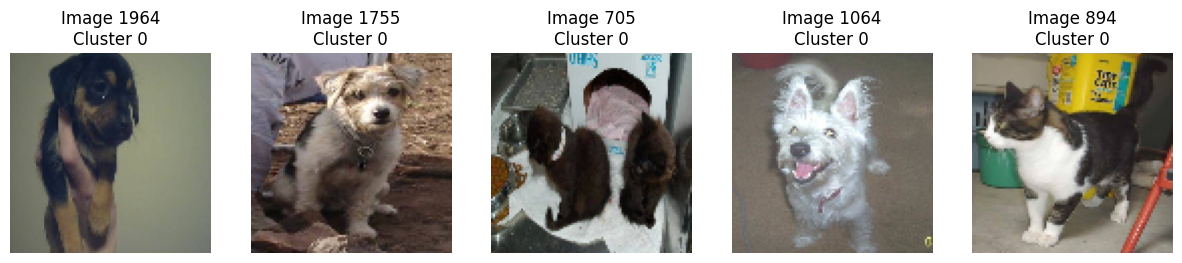

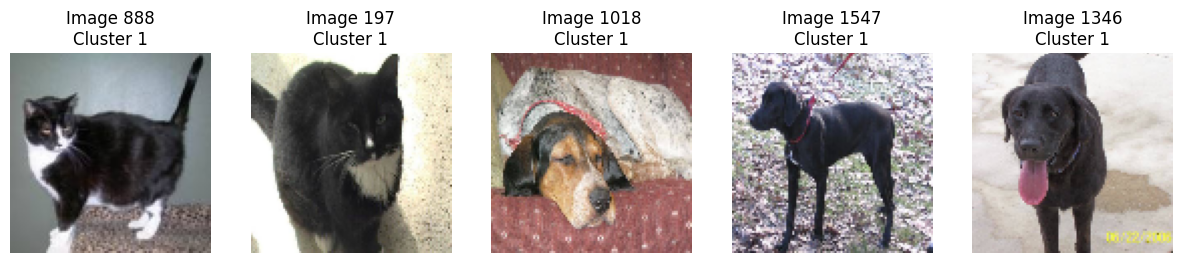

In [4]:
import matplotlib.pyplot as plt

# Function to plot sample images from each cluster
def plot_cluster_samples(images, labels, cluster_label, num_samples=5):
    cluster_indices = np.where(labels == cluster_label)[0]
    sample_indices = np.random.choice(cluster_indices, size=num_samples, replace=False)
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[idx].reshape(100, 100, 3))  # Reshape back to original image dimensions
        plt.axis('off')
        plt.title(f"Image {idx}\nCluster {cluster_label}")

# Plot sample images from each cluster
plot_cluster_samples(X, mapped_labels, 0)  # Cluster 0
plt.show()

plot_cluster_samples(X, mapped_labels, 1)  # Cluster 1
plt.show()